<a href="https://colab.research.google.com/github/Leonardob14/redeNeuralVinho/blob/master/redeNeuralVinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exemplo de MLP com TensorFlow em Notebook

Primeiramente, **importar** o dataset para o Drive  e  os pacotes necessários..

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic_train.csv to titanic_train.csv
User uploaded file "titanic_train.csv" with length 61194 bytes


Gerando Seed Random

In [0]:
seed = 7
np.random.seed(seed)

Carregando o **dataset** e ajustando as matrizes X  e Y (Labels)

In [0]:
dataset = np.loadtxt("titanic_train.csv", delimiter=",")

# Separando colunas input (X) e output (Y) 
X = dataset[:,0:11]
Y = dataset[:,11]


ValueError: ignored

In [0]:
print(Y[0])

5.0


Criando modelo MLP com 3 camadas (64 - 32 - 1)

In [0]:

inputs = keras.Input(shape=(11,)) 
x = keras.layers.Dense(256, activation='relu')(inputs)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dense(16, activation='relu')(x)
predictions = keras.layers.Dense(11, activation='softmax')(x)

model = keras.Model(inputs=inputs,outputs=predictions)


1599/1599 [==============================] - 0s 107us/sample - loss: 5.8159 - acc: 0.0338
acc: 3.38%
Train on 1599 samples, validate on 1599 samples
Epoch 1/1000
1599/1599 [==============================] - 0s 125us/sample - loss: 3.5142 - acc: 0.2308 - val_loss: 2.1866 - val_acc: 0.4071
Epoch 2/1000
1599/1599 [==============================] - 0s 32us/sample - loss: 1.9584 - acc: 0.4115 - val_loss: 1.7779 - val_acc: 0.3709
Epoch 3/1000
1599/1599 [==============================] - 0s 30us/sample - loss: 1.6869 - acc: 0.4303 - val_loss: 1.6064 - val_acc: 0.4472
Epoch 4/1000
1599/1599 [==============================] - 0s 31us/sample - loss: 1.5411 - acc: 0.4734 - val_loss: 1.4449 - val_acc: 0.4765
Epoch 5/1000
1599/1599 [==============================] - 0s 31us/sample - loss: 1.4416 - acc: 0.4522 - val_loss: 1.3533 - val_acc: 0.4759
Epoch 6/1000
1599/1599 [==============================] - 0s 31us/sample - loss: 1.3453 - acc: 0.4803 - val_loss: 1.2979 - val_acc: 0.5022
Epoch 7/1000
159

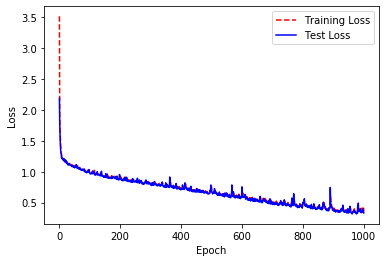

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [0]:
# Resumo da Rede
history = model.fit(X,
                   Y,
                   epochs=1000,
                   verbose=1,
                   batch_size=250,
                   validation_data=(X,Y))


training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();